# 2. Train Data Preprocessing

### Import library and data

In [39]:
import pandas as pd
import numpy as np
%matplotlib inline

ad = pd.read_csv("train_sample.csv", parse_dates=['click_time'])

### Check data

In [40]:
print(ad.shape)
print(ad.columns)

(100000, 8)
Index(['ip', 'app', 'device', 'os', 'channel', 'click_time', 'attributed_time',
       'is_attributed'],
      dtype='object')


### Make derived variables : hour, time

In [41]:
ad['hour'] = np.nan
ad['hour'] = ad['click_time'].dt.hour

ad['time'] = np.nan
ad['time'] = ad['hour'] // 4

print(ad[['click_time','hour','time']].head(20))

            click_time  hour  time
0  2017-11-07 09:30:38     9     2
1  2017-11-07 13:40:27    13     3
2  2017-11-07 18:05:24    18     4
3  2017-11-07 04:58:08     4     1
4  2017-11-09 09:00:09     9     2
5  2017-11-09 01:22:13     1     0
6  2017-11-09 01:17:58     1     0
7  2017-11-07 10:01:53    10     2
8  2017-11-08 09:35:17     9     2
9  2017-11-08 12:35:26    12     3
10 2017-11-08 08:14:37     8     2
11 2017-11-07 05:03:14     5     1
12 2017-11-09 10:24:23    10     2
13 2017-11-08 14:46:16    14     3
14 2017-11-07 00:54:09     0     0
15 2017-11-08 23:17:45    23     5
16 2017-11-09 07:33:41     7     1
17 2017-11-09 03:44:35     3     0
18 2017-11-06 23:14:08    23     5
19 2017-11-06 20:07:00    20     5


### Remove variables : click_time, attributed_time

In [42]:
del ad['click_time']
del ad['attributed_time']

### Make derived variables

* 'v'_cnt : frequency by 'v'
* 'v'_attr : the number of download by 'v'
* 'v'_attr_prop : the proporation of download by 'v'
* tot_attr_prop : the total of 'v'_attr_prop

In [43]:
var = ['ip','app','device','os','channel','hour','time']
var1 = ['ip_cnt','app_cnt','device_cnt','os_cnt','channel_cnt','hour_cnt','time_cnt']
var2 = ['ip_attr','app_attr','device_attr','os_attr','channel_attr','hour_attr','time_attr']
var3 = ['ip_attr_prop','app_attr_prop','device_attr_prop','os_attr_prop',
        'channel_attr_prop','hour_attr_prop','time_attr_prop']

for v,v1,v2,v3 in zip(var,var1,var2,var3):
    temp = ad[v].value_counts().reset_index(name='counts')
    temp.columns = [v,v1]
    ad = ad.merge(temp, on=v, how='left')

    temp = ad.groupby(v)['is_attributed'].sum().reset_index(name='counts')
    temp.columns = [v,v2]
    ad = ad.merge(temp, on=v, how='left')

    ad[v3] = np.nan
    ad[v3] = ad[v2] / ad[v1]
    
    print(ad[[v,v1,v2,v3]].head(20))

        ip  ip_cnt  ip_attr  ip_attr_prop
0    87540       8        0       0.00000
1   105560     149        0       0.00000
2   101424       2        0       0.00000
3    94584       3        0       0.00000
4    68413       4        0       0.00000
5    93663       2        0       0.00000
6    17059       8        0       0.00000
7   121505       5        0       0.00000
8   192967       5        0       0.00000
9   143636       1        0       0.00000
10   73839      25        0       0.00000
11   34812      11        0       0.00000
12  114809       3        0       0.00000
13  114220      95        0       0.00000
14   36150      52        0       0.00000
15   72116       1        0       0.00000
16    5314     616        3       0.00487
17  106598      21        0       0.00000
18   72065       3        0       0.00000
19   37301       4        0       0.00000
    app  app_cnt  app_attr  app_attr_prop
0    12    13198         1       0.000076
1    25      804         0       0

In [44]:
ad['tot_attr_prop'] = np.nan
ad['tot_attr_prop'] = ad[var3].sum(axis=1)
print(ad['tot_attr_prop'].head(20))

0     0.007270
1     0.006804
2     0.005529
3     0.006696
4     0.006936
5     0.008358
6     0.008139
7     0.010494
8     0.006415
9     0.008442
10    0.009910
11    0.009439
12    0.008570
13    0.008212
14    0.007530
15    0.008362
16    0.013805
17    0.008646
18    0.007742
19    0.008411
Name: tot_attr_prop, dtype: float64


* 'v'_'vv'_cnt : frequency by 'v' and 'vv'
* 'v'_'vv'_attr : the number of download by 'v' and 'vv'
* 'v'_'vv'_prop : the proporation of download by 'v' and 'vv'
* tot_vv_prop : the total of 'v'_'vv'_prop

In [45]:
var4 = ['ip_time_cnt','ip_app_cnt','ip_channel_cnt','time_app_cnt','time_channel_cnt']
var5 = ['ip_time_attr','ip_app_attr','ip_channel_attr','time_app_attr','time_channel_attr']
var6 = ['ip_time_prop','ip_app_prop','ip_channel_prop','time_app_prop','time_channel_prop']

for v in ['ip','time']:
    if v == 'time':
        v1 = ['app','channel']
    else:
        v1 = ['time','app','channel']
    
    for vv in v1:
        cnt = v+'_'+vv+'_cnt'
        attr =  v+'_'+vv+'_attr'
        prop = v+'_'+vv+'_prop'
        
        temp = ad.groupby([v,vv])['is_attributed'].count().reset_index(name='counts')
        temp.columns = [v,vv,cnt]
        ad = ad.merge(temp, on=[v,vv], how='left')
        
        temp = ad.groupby([v,vv])['is_attributed'].sum().reset_index(name='counts')
        temp.columns = [v,vv,attr]
        ad = ad.merge(temp, on=[v,vv], how='left')
        
        ad[prop]= np.nan
        ad[prop] = ad[attr] / ad[cnt]
        
        print(ad[[v,vv,cnt,attr,prop]].head(20))

        ip  time  ip_time_cnt  ip_time_attr  ip_time_prop
0    87540     2            2             0           0.0
1   105560     3           42             0           0.0
2   101424     4            1             0           0.0
3    94584     1            1             0           0.0
4    68413     2            2             0           0.0
5    93663     0            1             0           0.0
6    17059     0            2             0           0.0
7   121505     2            2             0           0.0
8   192967     2            2             0           0.0
9   143636     3            1             0           0.0
10   73839     2            2             0           0.0
11   34812     1            3             0           0.0
12  114809     2            1             0           0.0
13  114220     3           26             0           0.0
14   36150     0            6             0           0.0
15   72116     5            1             0           0.0
16    5314    

In [46]:
ad['tot_vv_prop'] = np.nan
ad['tot_vv_prop'] = ad[var6].sum(axis=1)
print(ad['tot_vv_prop'].head(20))

0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000212
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000645
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    0.000212
18    0.012821
19    0.000000
Name: tot_vv_prop, dtype: float64


### Check correlation

In [47]:
feat = var1 + var2 + var3 +var4 +var5 + var6 + ['is_attributed']

pearson

In [48]:
print(ad[feat].corr(method='pearson'))

                     ip_cnt   app_cnt  device_cnt    os_cnt  channel_cnt  \
ip_cnt             1.000000 -0.005644   -0.085115 -0.013335    -0.007876   
app_cnt           -0.005644  1.000000    0.075672  0.019252     0.332709   
device_cnt        -0.085115  0.075672    1.000000  0.124416     0.031362   
os_cnt            -0.013335  0.019252    0.124416  1.000000    -0.001913   
channel_cnt       -0.007876  0.332709    0.031362 -0.001913     1.000000   
hour_cnt          -0.011222  0.034421    0.011891 -0.001372     0.024710   
time_cnt          -0.014289  0.042229    0.010723 -0.003778     0.031040   
ip_attr            0.799699 -0.027097   -0.050141 -0.014987    -0.008288   
app_attr           0.005776  0.012090   -0.246103 -0.067724    -0.019669   
device_attr       -0.085724  0.062933    0.992833  0.117300     0.023704   
os_attr           -0.009940  0.004580    0.090449  0.959895    -0.012703   
channel_attr       0.004880 -0.143591   -0.206826 -0.059592    -0.034937   
hour_attr   

spearman

In [49]:
print(ad[feat].corr(method='spearman'))

                     ip_cnt   app_cnt  device_cnt    os_cnt  channel_cnt  \
ip_cnt             1.000000  0.018993   -0.112039 -0.013195    -0.002340   
app_cnt            0.018993  1.000000    0.076675  0.038165     0.171119   
device_cnt        -0.112039  0.076675    1.000000  0.170788     0.039300   
os_cnt            -0.013195  0.038165    0.170788  1.000000     0.012254   
channel_cnt       -0.002340  0.171119    0.039300  0.012254     1.000000   
hour_cnt          -0.006810  0.023574   -0.001061 -0.001695    -0.011743   
time_cnt          -0.022793  0.042882    0.019431  0.002141     0.015679   
ip_attr            0.182544 -0.038919   -0.058385 -0.027809    -0.022470   
app_attr          -0.013113  0.320635   -0.032666 -0.022824     0.107387   
device_attr       -0.113103  0.073173    0.999554  0.168079     0.036327   
os_attr           -0.011906  0.009454    0.105114  0.925925    -0.015678   
channel_attr      -0.008732  0.046199   -0.067571 -0.038327     0.304706   
hour_attr   

scatter plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B612B14908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001B61928E080>]], dtype=object)

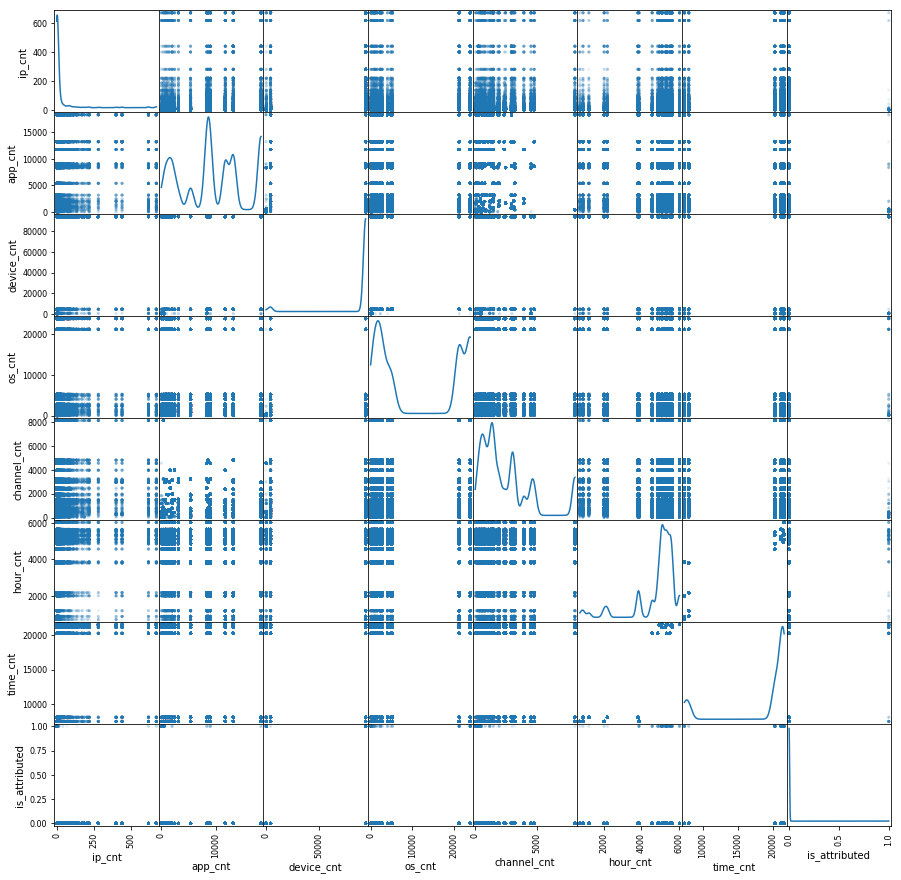

In [50]:
pd.plotting.scatter_matrix(ad[var1 + ['is_attributed']], figsize=(15,15), alpha=.1, cmap=ad.is_attributed, diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B619DB4B38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001B6229D9DA0>]], dtype=object)

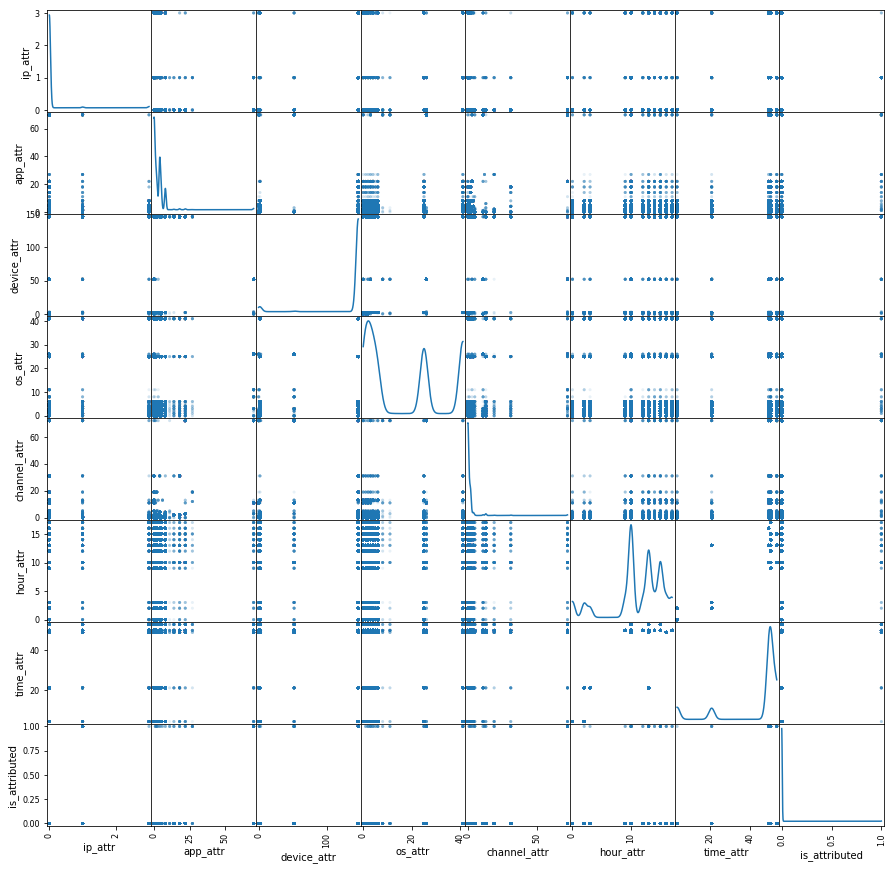

In [51]:
pd.plotting.scatter_matrix(ad[var2 + ['is_attributed']], figsize=(15,15), alpha=.1, diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B621B5C860>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001B620EF58D0>]], dtype=object)

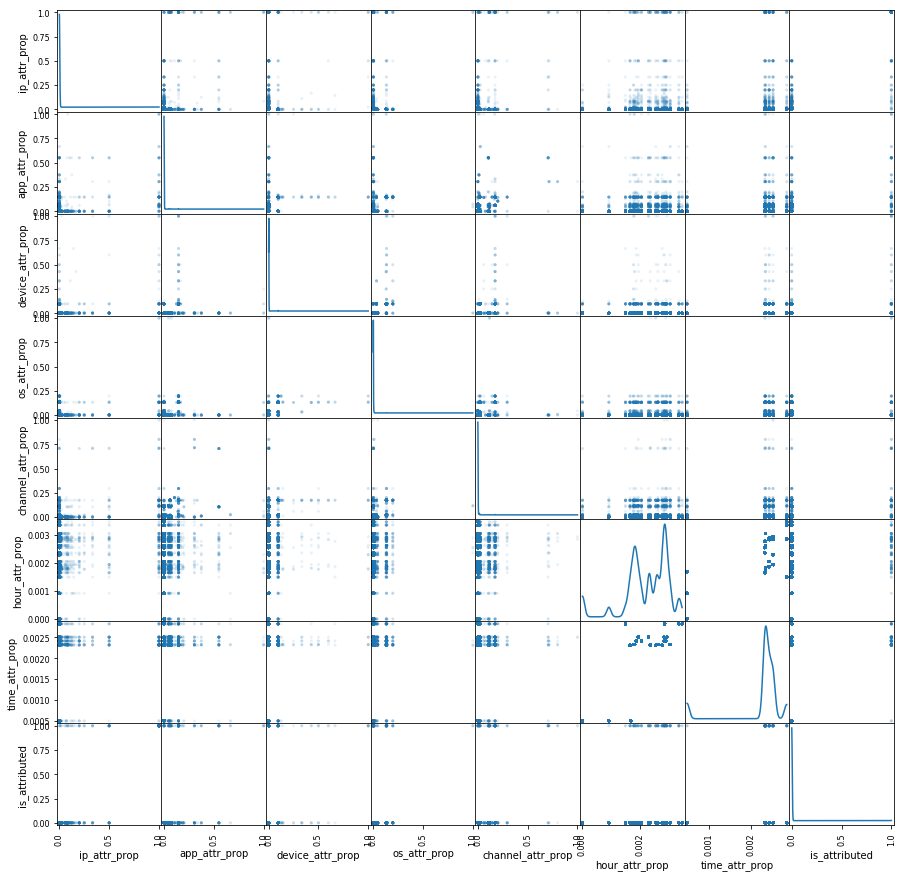

In [52]:
pd.plotting.scatter_matrix(ad[var3 + ['is_attributed']], figsize=(15,15), alpha=.1, diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B601FC0780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001B62BA2ABE0>]], dtype=object)

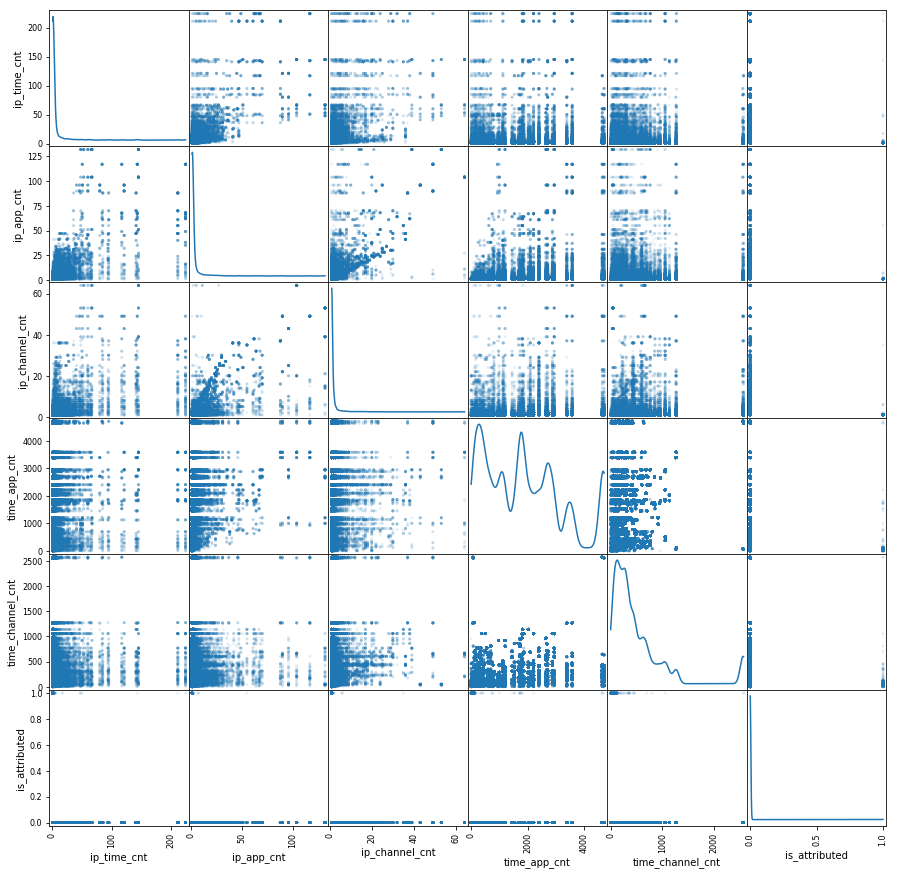

In [53]:
pd.plotting.scatter_matrix(ad[var4 + ['is_attributed']], figsize=(15,15), alpha=.1, diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B62E7504E0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001B6336E4588>]], dtype=object)

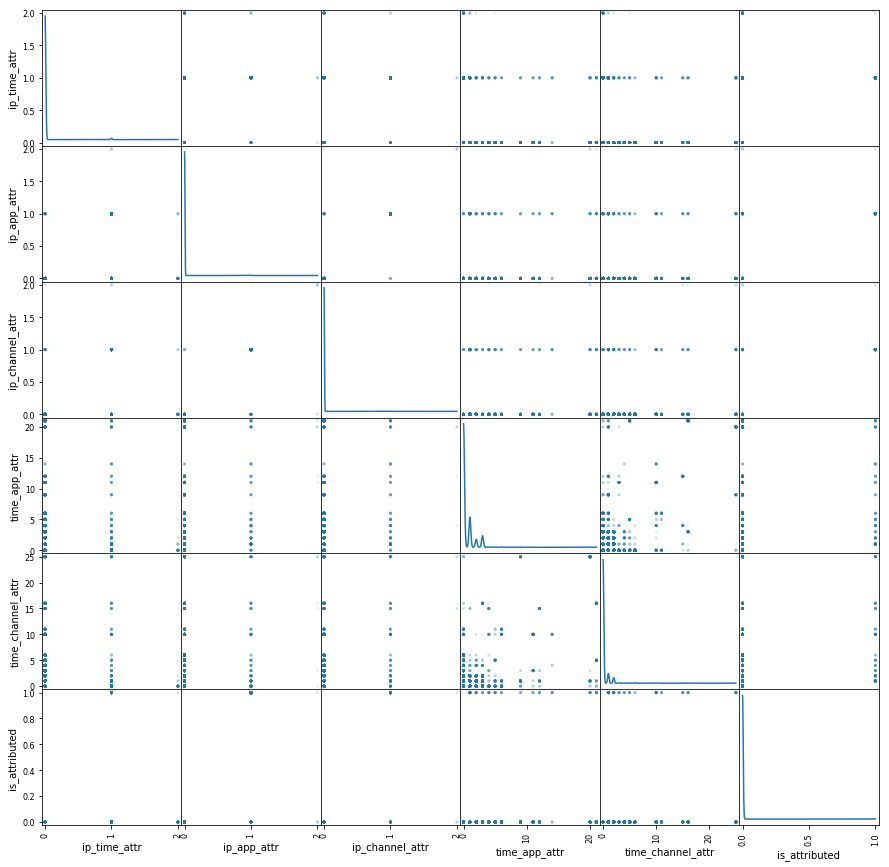

In [54]:
pd.plotting.scatter_matrix(ad[var5 + ['is_attributed']], figsize=(15,15), alpha=.1, diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B634D77B00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001B638FA0F60>]], dtype=object)

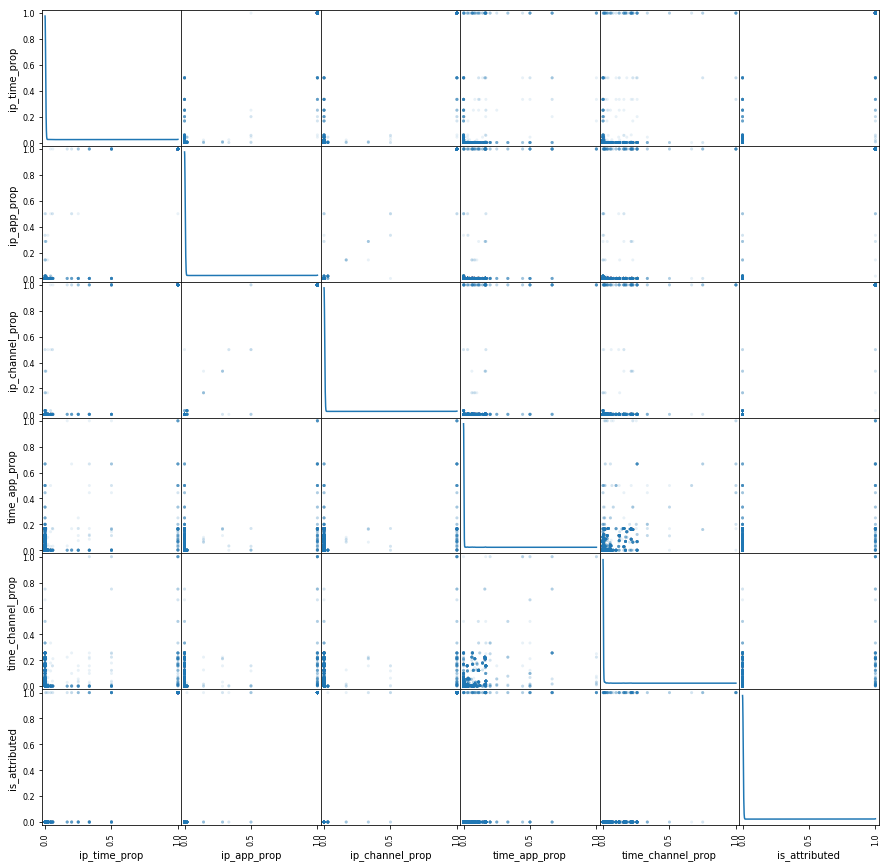

In [55]:
pd.plotting.scatter_matrix(ad[var6 + ['is_attributed']], figsize=(15,15), alpha=.1, diagonal='kde')